## Project Group - 31

Members (student number): 
- Gijs de Werd          (4717775)
- Georges Puttaert      (4686160)
- Thijs Roolvink        (4961382)
- Jim van Oosten        (4734998)

A link to the Github Repository: https://github.com/jimvanoosten/TIL6022_Group31

## Contribution Statement

**Gijs de Werd**: Setting up project and doing the Data analysis, coding data preparation

**Georges Puttaert**: Visualization general plots and coding of the data

**Thijs Roolvink**: Conceptualization, coding of the in depth plots

**Jim van Oosten**: Background research, coding conclusion >>>>

## Research Objective

**Hypotheses**: 

The hypothesis is that lower income classes can be very depended on flight with passengers and tourism and that gdp is dependent on these factors, high income classes less.

**Main question**: 

"How do air passenger volume, GDP, and tourism numbers interrelate from 2010 to 2020, and what do these interrelationships reveal about the economic resilience in terms of clustering?"

**Sub questions**:
- 1: How have air passenger volume, GDP, and tourism numbers differ from 2010 to 2020 in general, and are there discernible patterns in their time series data across countries? *los dit op door naar de timeseries te kijken naar rare trends*

- 2: How do the three key metrics – air passenger volume, GDP, and tourism numbers correlate with each other across countries? *kijken of er bepaalde conclusies te trekken vallen, noteer deze als hypothese, bijvoorbeeld dat tourism and passenger numbers veel correlatie hebben. En dat gdp soms ook samenhang heeft met tourism*

- 3: How do countries cluster together when analyzed based on air passenger volume, GDP, and tourism data, and what common aspects can be identified within these clusters that hint at their economic resilience? *kijk dus in de cluster, cluster met Spanje hangt erg af van passagiers en tourism enzo dus dat is groot aandeel van de economie*

- 4: In the identified clusters, how do member countries' key metrics distribute, and how do their correlation heatmaps compare to our initial hypotheses? *check of the hypotheses een beetje overeen komen met de data die we nu per cluster gezien heb*

Maak dus nu conclusie dat er tussen bepaalde landen een aantal samenhangende aspecten zijn, dat dus sommige landen samen worden geclusterd adhv tourism en gdp. Ook dat landen in cluster zelfde patterns vertonen: gdp niet afhhanekelijk van tourism en air passengers etc. State dat een luxembourg niet echt sensitive is met tourism en passengers irt GDP maar dit wel het geval is bij Spanje. Adhv van deepdive in sommige countries is te zien waarom ze op elkaar lijken. 

**SHORT DESCIPTION OF HOW WE WANT IT:we want to begin high level, so tell somethijng about the three factors, then show the timesereis for visualization, then we want tp dive a bit deeper in the correlation between the three factors, so how they interrelate, maybe a question can be like do the factors correlate the same with each other per country, make a few hypotheses about the correlations and some countries ( we check this via our dashboard). Then we do the kmeans clustering so a question can be how are the countries clustered based on the aspects. Then after the clusters are formed, we check boxplots per cluster the see how the data is per boxplot (maybe a question here about how to analzye the boxplot). Then we dive deeper in some countries and check the correlation heatmap for these countries (maybe one per cluster) to check if our hypotheses from before are still the same. Analyze it and state that there can be differences (can also be a subquestion) in comparison with the hypotheses. So a question can be what are the differences between cluster countries on the behavior of the three aspects**

*some answers already for a quick overview*:
- *The clustering algorithm can cluster countries based on these factors*
- *There can be seen that luxembourg do not care if lower passengers or tourism, gdp still stays high*
- *The lower income countries can be determined with the kmeans and there can be seen that Italy, Spain, France and Germany indeed need tourism and passengers, can be clearly seen*
- *AT, BE, DK, FI, LU, NL, SE: These are high income classes and are clustered together based on the criteria.*

## Data Used

GDP per capita, quarterly data to monthly: https://ec.europa.eu/eurostat/databrowser/view/namq_10_gdp/default/table?lang=en \
Commercial flights by reporting airport – monthly data: https://ec.europa.eu/eurostat/databrowser/view/avia_paoc__custom_7863778/default/line?lang=en \
Arrivals at tourist accommodation establishments - monthly data: https://ec.europa.eu/eurostat/databrowser/product/view/tour_occ_nim \

## Data Pipeline

## 1. Introduction

From the year 2010 to 2020, the aviation sector showed a rapid increase in air passengers and the tourism sector flourished influencing the global GDP. Countries in the EU are influenced by the number fluctuations regarding the air passengers, tourism, and GDP per capita. Where lower-income countries are being more vulnarable to disruuotions in air passengers and tourism, whereas higher income countries tend be more resilient. Countries as Italy and Spain depend highly on air passengers and tourism. This study aims to deep dive into the interrealtion between the three factors in the EU countries. Using data from a decade before the COVID-19 pandamic, since biased results are generated. Throughout data analysis and unsupervised clustering methods, pattern are uncovered highlighting the economic behaviors of countries in response to air passengers, tourism and GDP. The EU countries are clustered based on these pattern are will show significant interrelations which can be linked to the social and income class of a country. 



## 2. Data preperation

In [1]:
# pip install pandas matplotlib scikit-learn scipy numpy seaborn plotly country-converter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import scipy.stats as stats
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
import country_converter as coco
import plotly.express as px
import wbdata

In [3]:
traffic = pd.read_csv('Datasets/air_passengers_from2000.csv')
tourism = pd.read_csv('Datasets/tourism_from2000.csv')
gdp = pd.read_csv('Datasets/gdp_from2000.csv')

In [4]:
def quarter_to_month(quarter):
    year, qtr = quarter.split('-')
    if qtr == 'Q1':
        return [f'{year}-01', f'{year}-02', f'{year}-03']
    elif qtr == 'Q2':
        return [f'{year}-04', f'{year}-05', f'{year}-06']
    elif qtr == 'Q3':
        return [f'{year}-07', f'{year}-08', f'{year}-09']
    else: # 'Q4'
        return [f'{year}-10', f'{year}-11', f'{year}-12']

mask = gdp['TIME_PERIOD'].str.match(r'\d{4}-Q[1-4]$')
gdp.loc[mask, 'TIME_PERIOD'] = gdp.loc[mask, 'TIME_PERIOD'].apply(quarter_to_month)
gdp = gdp.explode('TIME_PERIOD')

In [5]:
# Make a database 
traffic = traffic.rename(columns={'OBS_VALUE': 'Traffic'})
tourism = tourism.rename(columns={'OBS_VALUE': 'Tourism'})
gdp = gdp.rename(columns={'OBS_VALUE': 'GDP'})


traffic_filtered = traffic[
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2010-01') & 
    (traffic['TIME_PERIOD'] <= '2020-01')                   
]

tourism_filtered = tourism[
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2010-01') &
    (tourism['TIME_PERIOD'] <= '2020-01')
]

gdp_filtered = gdp[
    (gdp['unit'] == 'CP_EUR_HAB') &
    (gdp['s_adj'] == 'NSA') &
    (gdp['na_item'] == 'B1GQ') &
    (gdp['TIME_PERIOD'] >= '2010-01') &
    (gdp['TIME_PERIOD'] <= '2020-01')
]

In [6]:
# Merge the dataset into 1 big dataset
countries = ["AT", "BE", "BG", "CY", "CZ", "DE", "DK", "EE", "EL", "ES", "FI", "FR", "HR", "HU", 'UK', "IT", "LT", "LU", "LV", "MT", "NL", "PL", "PT", "RO", "SE", "SI", "SK"]

traffic_filtered = traffic_filtered[traffic_filtered['geo'].isin(countries)]
tourism_filtered = tourism_filtered[tourism_filtered['geo'].isin(countries)]
gdp_filtered = gdp_filtered[gdp_filtered['geo'].isin(countries)]


merged_data = pd.merge(traffic_filtered[['TIME_PERIOD', 'geo', 'Traffic']], 
                       gdp_filtered[['TIME_PERIOD', 'geo', 'GDP']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data,
                       tourism_filtered[['TIME_PERIOD', 'geo', 'Tourism']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

In [7]:
# Prepare data for usage of the World Bank data package
countries_df = pd.DataFrame()
countries_df['country'] = countries
cc = coco.CountryConverter()
countries_df['country'] = countries_df['country'].replace('EL', 'GR')
countries_df['country'] = cc.pandas_convert(series=countries_df['country'], to='ISO3')
countries_df['country names'] = cc.convert(names=countries_df['country'], to="name")

## 3. Visualization

### First impression different income classes within the EU based on GNI
The GNI (Gross National Income) per capita for all Europian Union countries and the average. For the years 2010 and 2020.

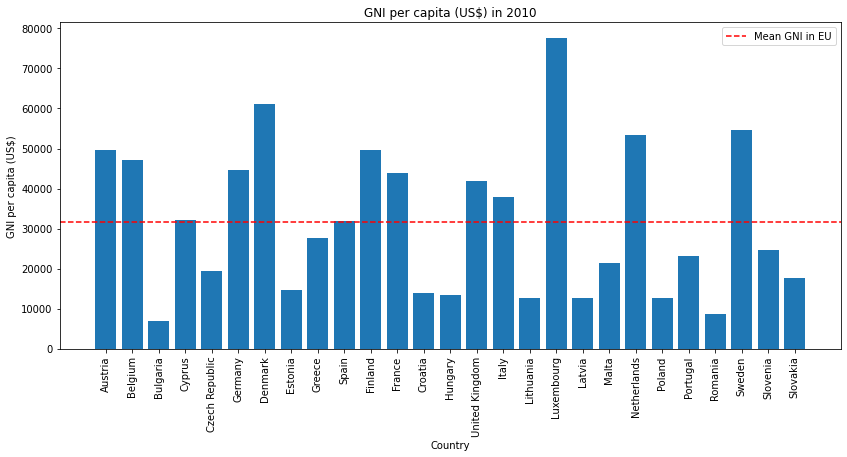

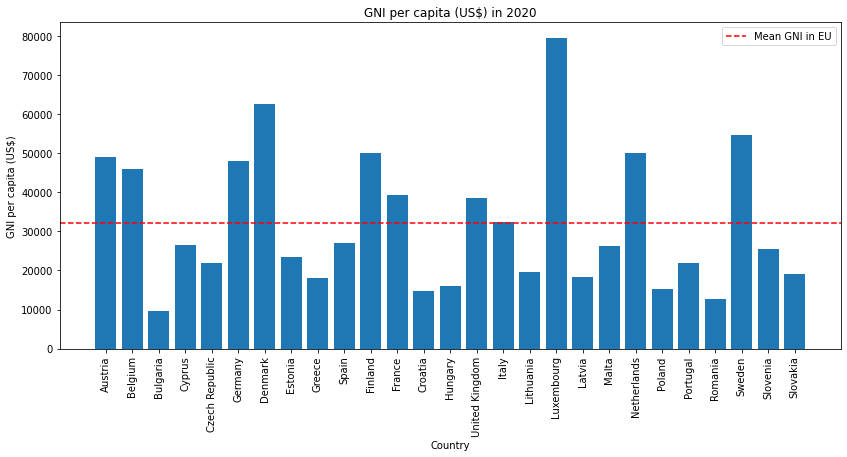

In [9]:
Indicator = "GNI per capita (US$)"
indicator_code = {'NY.GNP.PCAP.CD': 'GNI per capita (US$)'}
years = ['2010', '2020']

for year in years:
    countries_df[year] = 0

for i in range(len(countries_df)):
    for j in years:
        data = wbdata.get_dataframe(indicator_code, country=countries_df['country'][i])
        value = data['GNI per capita (US$)'][f'{j}']
        countries_df.loc[i, f'{j}'] = value

for year in years:
    plt.figure(figsize=(14, 6))
    plt.bar(countries_df['country names'], countries_df[year])
    plt.axhline(countries_df[f'{year}'].mean(), color='red', linestyle='--', label='Mean GNI in EU')
    plt.xlabel('Country')
    plt.ylabel(f'{Indicator}')
    plt.title(f'{Indicator} in {year}')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

### Time series interactive dashboard, default option is no country

In [7]:
merged_data = merged_data.sort_values(by=['geo', 'TIME_PERIOD'])

fig = go.Figure()

# Scatter for Traffic
for country in merged_data['geo'].unique():
    country_data = merged_data[merged_data['geo'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['TIME_PERIOD'],
        y=country_data['Traffic'],
        mode='lines',
        name=f"Traffic {country}",
        visible="legendonly"
    ))

# Scatter forTourism
for country in merged_data['geo'].unique():
    country_data = merged_data[merged_data['geo'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['TIME_PERIOD'],
        y=country_data['Tourism'],
        mode='lines',
        name=f"Tourism {country}",
        visible="legendonly"
    ))

# Scatter for GDP
for country in merged_data['geo'].unique():
    country_data = merged_data[merged_data['geo'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['TIME_PERIOD'],
        y=country_data['GDP'],
        mode='lines',
        name=f"GDP {country}",
        yaxis="y2",  
        visible="legendonly"
    ))

fig.update_layout(
    title='Traffic, Tourism, and GDP (2010-2022)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Traffic/Tourism Value'),
    yaxis2=dict(title='GDP Value', overlaying='y', side='right', title_standoff=25), 
    showlegend=True,
    legend=dict(x=1.05)
)

fig.show()


### Correlation heatmap and time series interactive dashboard

For the correlation heatmap and the timeseries Dashboard for each country, please visit:

http://127.0.0.1:8051/

## 4. Unsupervised learning: Kmeans clustering

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[['Traffic','Tourism', 'GDP']])

c:\Users\Georges Puttaert\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



c:\Users\Georges Puttaert\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Georges Puttaert\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Georges Puttaert\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Georges Puttaert\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

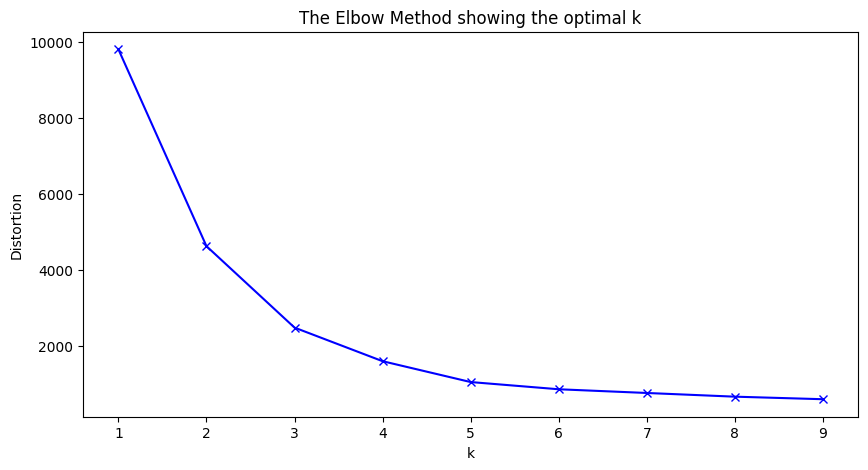

In [9]:
# Determine the number of clusters (using Elbow method as an example)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
merged_data['Cluster'] = clusters

c:\Users\Georges Puttaert\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



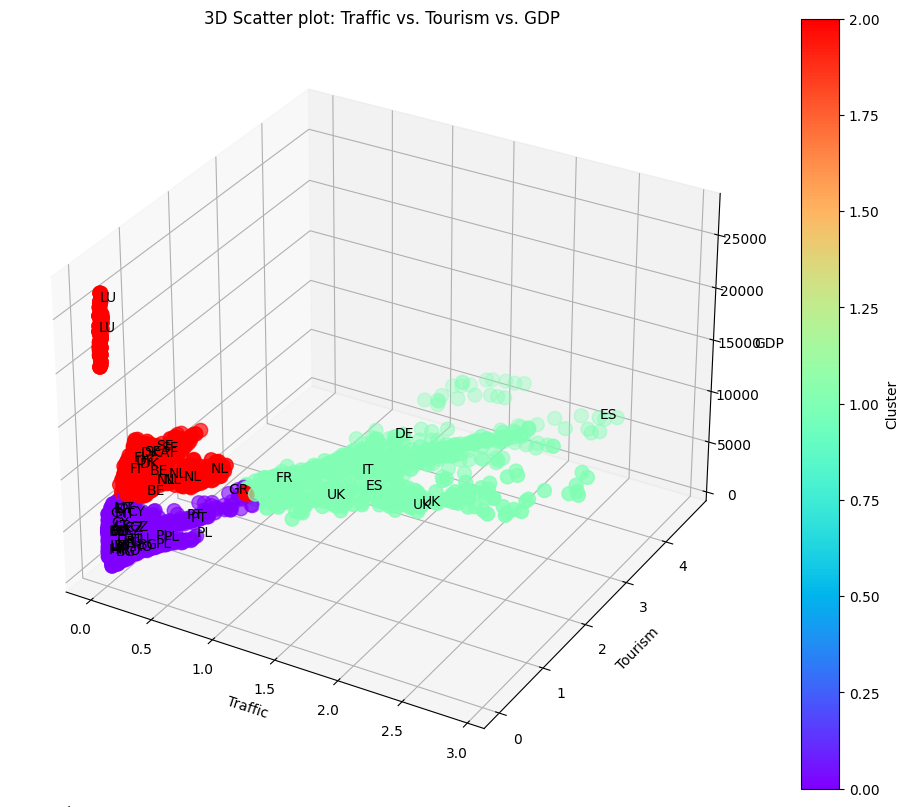

In [29]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(merged_data['Traffic'], merged_data['Tourism'], merged_data['GDP'], c=merged_data['Cluster'], cmap='rainbow', s=100)

# for idx, row in merged_data.iterrows():
#     ax.text(row['Traffic'], row['Tourism'], row['GDP'], row['geo'])

for i, row in merged_data.iterrows():
    if np.random.rand() < 0.02:  # Only annotate 10% of the points
        ax.text(row['Traffic'], row['Tourism'], row['GDP'], row['geo'])

ax.set_xlabel('Traffic')
ax.set_ylabel('Tourism')
ax.set_zlabel('GDP')
ax.set_title('3D Scatter plot: Traffic vs. Tourism vs. GDP')

fig.colorbar(sc).set_label('Cluster')

plt.show()


In [12]:
def mode_cluster(x):
    mode, _ = stats.mode(x)
    return mode[0]

country_clusters = merged_data.groupby('geo')['Cluster'].apply(mode_cluster).reset_index()
cluster = {}
for cluster_num in range(k):
    print(f"Cluster {cluster_num}: {', '.join(country_clusters[country_clusters['Cluster'] == cluster_num]['geo'].tolist())}")
    cluster[cluster_num] = country_clusters[country_clusters['Cluster'] == cluster_num]['geo'].tolist()

Cluster 0: BG, CY, CZ, EE, EL, HR, HU, LT, LV, MT, PL, PT, RO, SI, SK
Cluster 1: DE, ES, FR, IT, UK
Cluster 2: AT, BE, DK, FI, LU, NL, SE


C:\Users\Georges Puttaert\AppData\Local\Temp\ipykernel_15384\3170051467.py:2: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



### Boxplot per cluster 

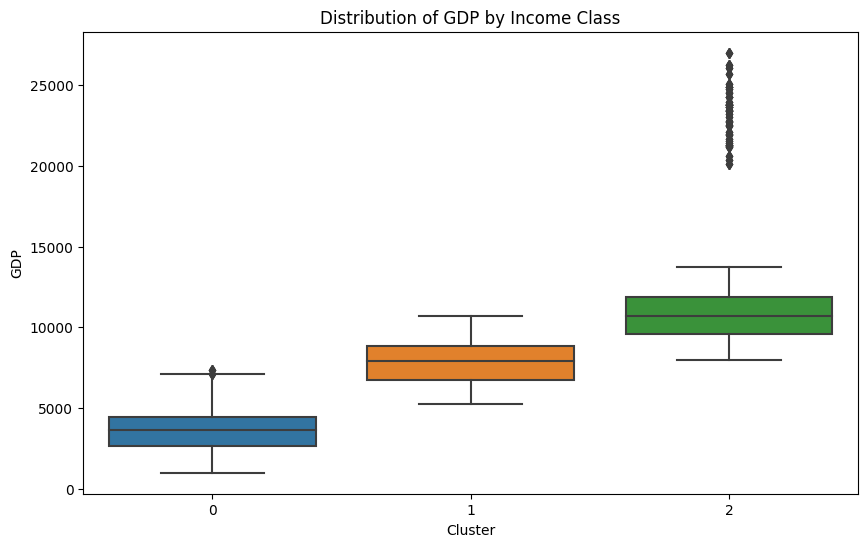

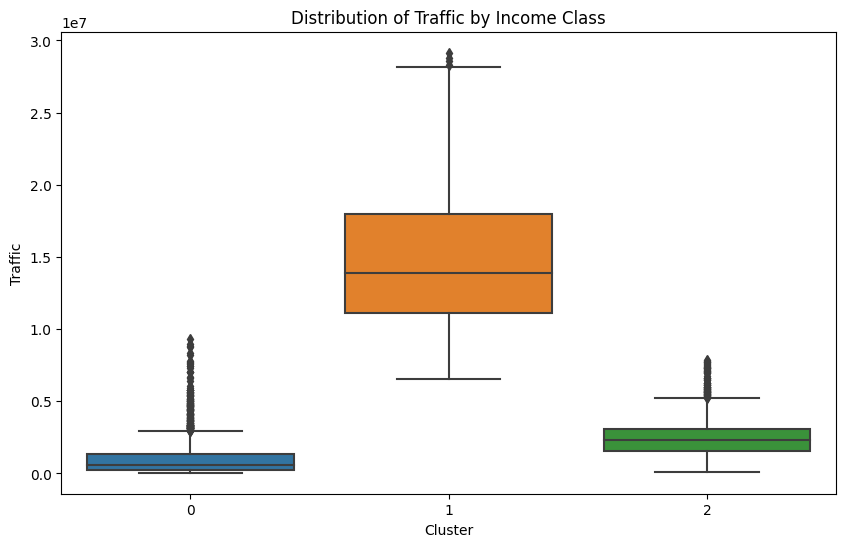

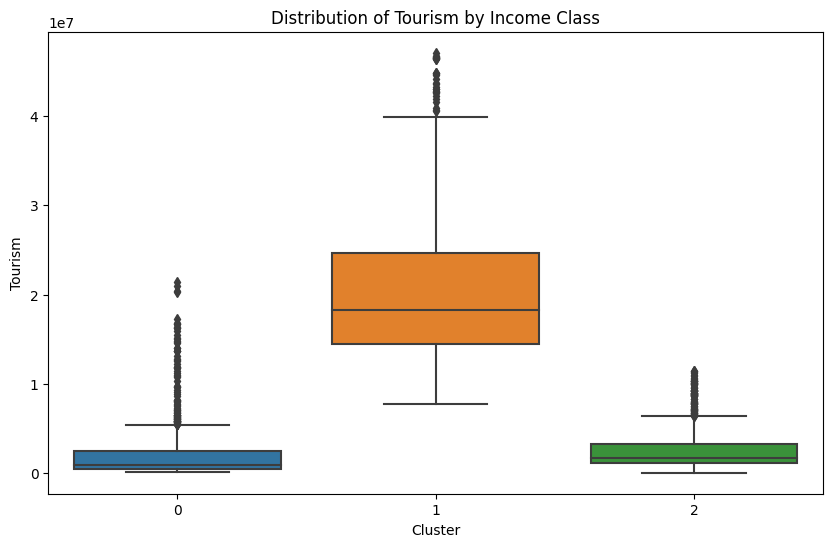

In [13]:
country_to_cluster = {country: cluster for cluster, countries in cluster.items() for country in countries}
merged_data['Income Class'] = merged_data['geo'].map(country_to_cluster)
metrics = ['GDP', 'Traffic', 'Tourism']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Income Class', y=metric, data=merged_data)
    plt.title(f'Distribution of {metric} by Income Class')
    plt.ylabel(metric)
    plt.xlabel('Cluster')
    plt.show()

- Cluster 0 (15 countries): These countries are the smallest in terms of GDP, tourism, and air passengers.

    - GDP: These nations might be developing or have smaller economies in comparison to the other two clusters.
    - Tourism: They have emerging tourist destinations or destinations that might be popular locally or regionally but not as internationally renowned.
    - Air Passengers: They see fewer international passengers, likely due to having fewer international airports or fewer connections to major global hubs.

- Cluster 1 (5 countries): These are the top performers in all three categories, signifying their importance both in Europe and globally.

    - GDP: Being some of the largest economies in Europe, they play a pivotal role in global economic activities.
    - Tourism: These are top tourist destinations, attracting a vast majority of international tourists due to their diverse attractions.
    - Air Passengers: Serving as significant hubs for international travel, these countries likely have multiple major international airports.

- Cluster 2 (7 countries): These countries are in between the other two clusters in all categories, signifying their robust yet not dominant position.

    - GDP: While not as high as Cluster 1, these countries still have strong economies, possibly with a high GDP per capita.
    - Tourism: Catering to both mainstream and niche tourist markets, they have a significant number of tourists but not as much as Cluster 1.
    - Air Passengers: They have good connectivity and might serve as secondary hubs in Europe, but they don't see as much traffic as the countries in Cluster 1.

## Hierachical Clustering to visualize the distance between the countries

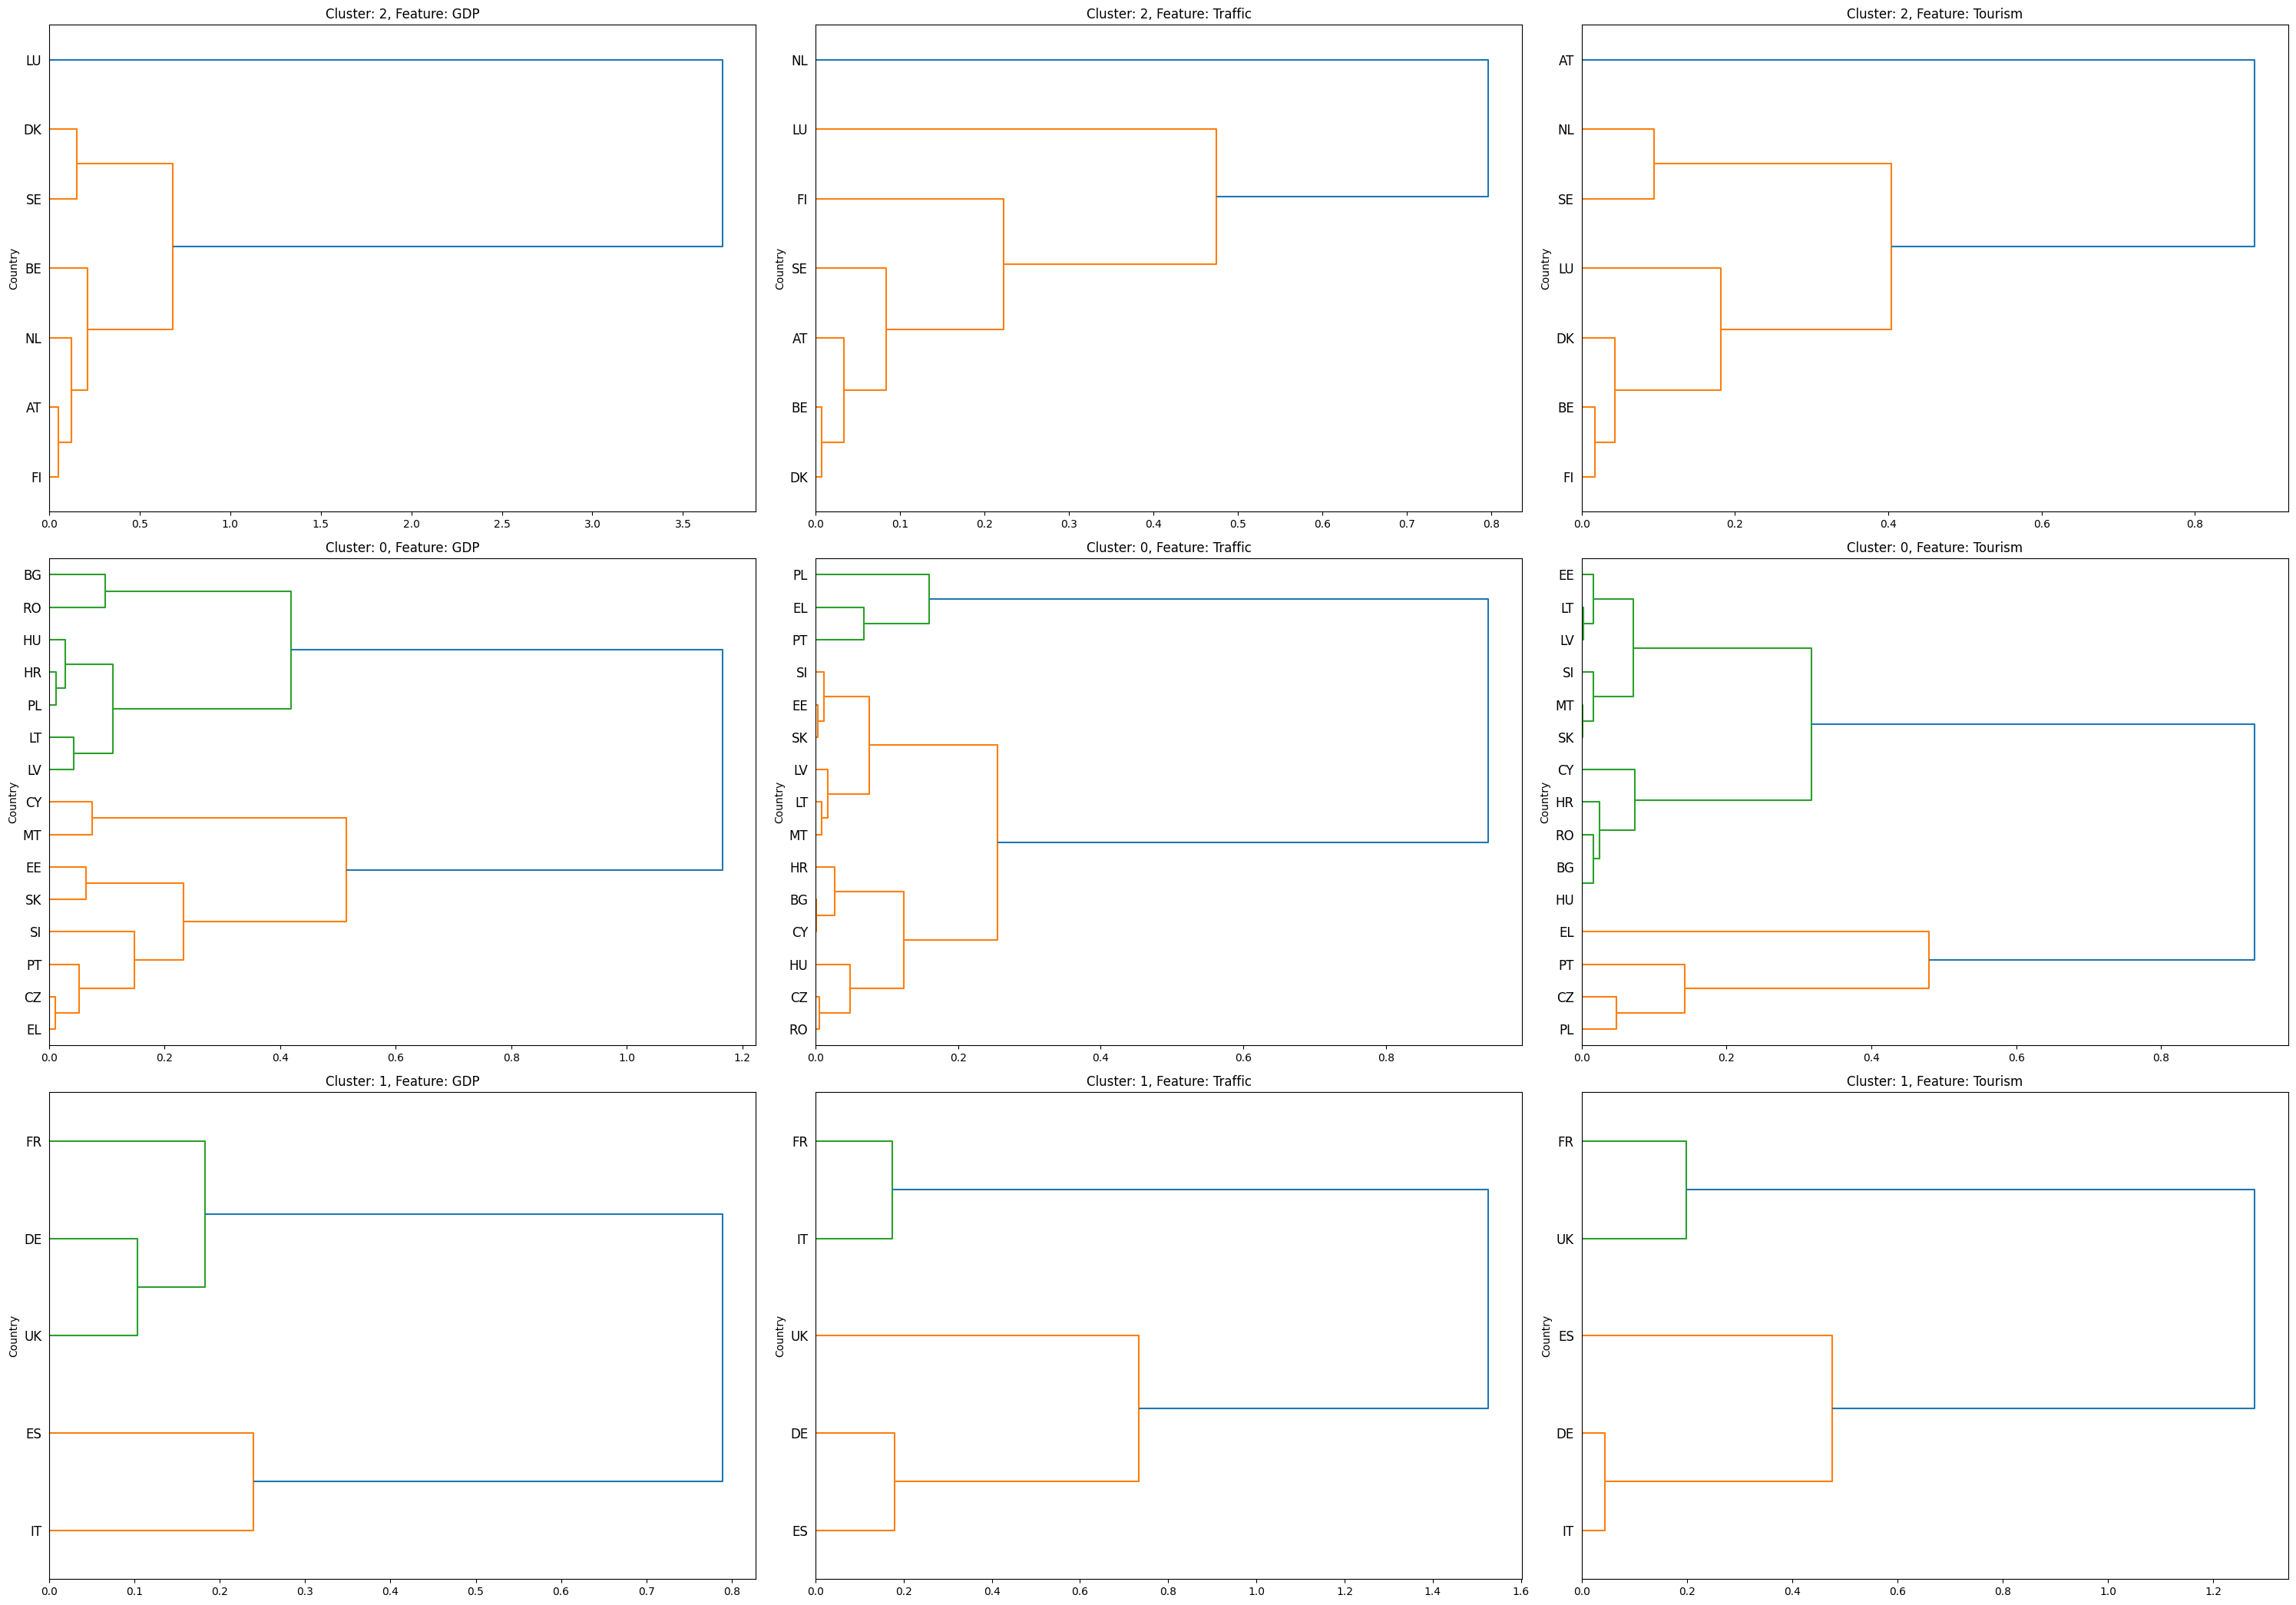

In [14]:
scaler = StandardScaler()
scale_cols = ['GDP','Traffic', 'Tourism']

merged_data_scaled = merged_data.copy()
merged_data_scaled[scale_cols] = scaler.fit_transform(merged_data_scaled[scale_cols])

# Create a set of unique income classes
income_clusters = merged_data_scaled['Income Class'].unique()

plt.figure(figsize=(30, 7 * len(income_clusters)))
for i, cluster in enumerate(income_clusters):
    sub_df = merged_data_scaled[merged_data_scaled['Income Class'] == cluster]
    mean_sub_df = sub_df.groupby('geo')[scale_cols].mean()
    for j, col in enumerate(scale_cols):
        plt.subplot(len(income_clusters), len(scale_cols), i * len(scale_cols) + j + 1)
        # Perform hierarchical clustering
        linked = linkage(mean_sub_df[[col]], method='ward')
        
        # Plot the dendrogram
        plt.title(f'Cluster: {cluster}, Feature: {col}')
        dendrogram(linked, orientation='right', distance_sort='descending', labels=mean_sub_df.index)
        plt.ylabel('Country')
        
plt.tight_layout()
plt.show()

## Map

In [15]:
cc = coco.CountryConverter()
merged_data['geo'] = merged_data['geo'].replace('EL', 'GR')
iso3_codes = cc.pandas_convert(series=merged_data['geo'], to='ISO3')
merged_data['geo_ISO_3'] = iso3_codes

In [16]:
for i, cluster in enumerate(income_clusters):
    sub_df = merged_data[merged_data['Income Class'] == cluster]
    for j, col in enumerate(scale_cols):
        fig = px.choropleth(
            sub_df,
            locations='geo_ISO_3',
            locationmode='ISO-3',
            color=col,
            hover_name='geo',
            animation_frame='TIME_PERIOD',
            title= str(col) + ' of European Countries of Cluster ' + str(cluster) + ' from 2010 to 2020',
            scope='europe',
            color_continuous_scale=px.colors.sequential.Emrld,
            range_color = (min(sub_df[col]), max(sub_df[col])),
            height = 1000, 
            width = 750
        )

        # Adjust the slider properties
        sliders_dict = {
            'active': 0,
            'yanchor': 'top',
            'xanchor': 'left',
            'currentvalue': {
                'font': {'size': 15},
                'prefix': 'Year:',
                'visible': True,
                'xanchor': 'right'
            }
        }

        fig.update_layout(sliders=[sliders_dict])
        fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
        fig.update_geos(fitbounds="locations")
        fig.show()

## 5. Conclusion and discussion

some answers:
- *The clustering algorithm can cluster countries based on these factors*
- *There can be seen that luxembourg do not care if lower passengers or tourism, gdp still stays high*
- *The lower income countries can be determined with the kmeans and there can be seen that Italy, Spain, France and Germany indeed need tourism and passengers, can be clearly seen*
- *AT, BE, DK, FI, LU, NL, SE: These are high income classes and are clustered together based on the criteria.*
-  Can be seen that in countries like Bulgaria: the gdp, air passengers and tourism relate to each other, all low and all high. For France, Belgium for example you see that this isnt the story because GDP is relatively lower when tourism and air passengers are relatively higher.

Through this research, the complexities of interrelations between flight volume, GDP growth, and tourism numbers from 2010 to 2020 have been examined with a focus on their implications for economic resilience across varying income classes.

The adoption of clustering algorithms, particularly K-means, has proven instrumental in unveiling patterns and relationships based on the three selected economic indicators. By observing the clusters formed, it became evident how countries inherently align or diverge based on their dependency or independence on these factors.

Countries such as Luxembourg displayed a unique clustering pattern, indicating a relative economic independence from the aviation and tourism sectors. This is contrasted by countries like Italy, Spain, France, and Germany, whose economic well-being demonstrated a stronger reliance on tourism and aviation, as reflected in their cluster grouping.

When viewing the broader landscape of high-income countries, there's a clear pattern of clustering based on flight volume, tourism, and GDP metrics, underscoring their economic interdependencies. Notably, countries like AT, BE, DK, FI, LU, NL, and SE were found to cluster together, solidifying the findings.

The results underscore the power of data-driven clustering techniques in shedding light on intricate economic dynamics and providing nuanced understandings of country-specific economic behaviors. Such insights can guide policymakers and stakeholders in shaping economic strategies that are both responsive and adaptive to changing global trends.

## References